# Deep Learning and Tensorflow

### In this exercise, we explore different initialization, optimization and regularization techniques and model a multi-classification problem using Python and Tensorflow incorporatig some of these techniques. 

### Optimization Methods

#### 1 - (Batch) Gradient Descent

A simple optimization method in machine learning is gradient descent (GD). When you take gradient steps with respect to all $m$ examples on each step, it is also called Batch Gradient Descent. 
The  gradient descent rule is, for $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

where L is the number of layers and $\alpha$ is the learning rate. 


``` python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost
    cost_total = compute_cost(a, Y)  # Cost for m training examples
    # Backward propagation
    grads = backward_propagation(a, caches, parameters)
    # Update parameters
    parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m
        
```

#### 2 -  Stocastic Gradient Descent

A variant of Gardient Descent is Stochastic Gradient Descent (SGD), which is equivalent to mini-batch gradient descent, where each mini-batch has just 1 example. What changes is that you would be computing gradients on just one training example at a time, rather than on the whole training set. The code examples below illustrate the difference between stochastic gradient descent and (batch) gradient descent. 

```python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    cost_total = 0
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost_total += compute_cost(a, Y[:,j])  # Cost for one training example
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters
        parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m
```


In Stochastic Gradient Descent, you use only 1 training example before updating the gradients. When the training set is large, SGD can be faster. But the parameters will "oscillate" toward the minimum rather than converge smoothly. Here's what that looks like: 

<img src="../images/kiank_sgd.png" style="width:750px;height:250px;">

<caption>
    <center> 
        <font color='purple'> 
            <b>Figure 1 : SGD vs GD</b><br> "+" denotes a minimum of the cost. SGD leads to many oscillations to reach convergence, but each step is a lot faster to compute for SGD than it is for GD, as it uses only one training example (vs. the whole batch for GD).
        </font>
    </center> 
</caption>

Implementing SGD requires 3 for-loops in total:
1. Over the number of iterations
2. Over the $m$ training examples
3. Over the layers (to update all parameters, from $(W^{[1]},b^{[1]})$ to $(W^{[L]},b^{[L]})$)

In practice, you'll often get faster results if you don't use the entire training set, or just one training example, to perform each update. 
    

#### 3 - Mini-Batch Gradient Descent

Mini-batch gradient descent uses an intermediate number of examples for each step. With mini-batch gradient descent, you loop over the mini-batches instead of looping over individual training examples.
    
```python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_epochs):
    #generate mini batches by shuffling and partitioning
    minibatches = random_mini_batches(X, Y, mini_batch_size)
    for minibatch in minibatches:
        #get x and y component of each minibatch
        (mini_X, mini_Y) = minibatch
        # Forward propagation
        a, caches = forward_propagation(mini_X, parameters)
        # Compute cost
        cost_total += compute_cost(a, mini_Y)  # Cost for one training example
        # Backward propagation
        grads = backward_propagation(a, mini_Y, caches)
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
    # Compute average cost
    cost_avg = cost_total / m
```

<img src="../images/kiank_minibatch.png" style="width:750px;height:250px;">
    
<caption><center> <u> <font color='purple'> <b>Figure 2</b> </u>: <font color='purple'>  <b>SGD vs Mini-Batch GD</b><br> "+" denotes a minimum of the cost. Using mini-batches in your optimization algorithm often leads to faster optimization. </center></caption>

There are two steps:
- **Shuffle**: Create a shuffled version of the training set (X, Y) as shown below. Each column of X and Y represents a training example. Note that the random shuffling is done synchronously between X and Y. Such that after the shuffling the $i^{th}$ column of X is the example corresponding to the $i^{th}$ label in Y. The shuffling step ensures that examples will be split randomly into different mini-batches. 

<img src="../images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partition**: Partition the shuffled (X, Y) into mini-batches of size `mini_batch_size` (here 64). Note that the number of training examples is not always divisible by `mini_batch_size`. The last mini batch might be smaller. When the final mini-batch is smaller than the full `mini_batch_size`, it will look like this: 

<img src="../images/kiank_partition.png" style="width:550px;height:300px;">

- Shuffling and Partitioning are the two steps required to build mini-batches
- Powers of two are often chosen to be the mini-batch size, e.g., 16, 32, 64, 128.
<a name='ex-2'></a>
    




<a name='4'></a>
#### 4 - Momentum

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations. 

Momentum takes into account the past gradients to smooth out the update. The 'direction' of the previous gradients is stored in the variable $v$. Formally, this will be the exponentially weighted average of the gradient on previous steps. You can also think of $v$ as the "velocity" of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill. 

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'><b>Figure 3</b> </u><font color='purple'>: The red arrows show the direction taken by one step of mini-batch gradient descent with momentum. The blue points show the direction of the gradient (with respect to the current mini-batch) on each step. Rather than just following the gradient, the gradient is allowed to influence $v$ and then take a step in the direction of $v$.<br> <font color='black'> </center>
    
The velocity, $v$, is a python dictionary that needs to be initialized with arrays of zeros. Its keys are the same as those in the `grads` dictionary, that is:
for $l =1,...,L$:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
```


Now, implement the parameters update with momentum. The momentum update rule is, for $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

where L is the number of layers, $\beta$ is the momentum and $\alpha$ is the learning rate.

- The velocity is initialized with zeros. So the algorithm will take a few iterations to "build up" velocity and start to take bigger steps.
- If $\beta = 0$, then this just becomes standard gradient descent without momentum. 
- The larger the momentum $\beta$ is, the smoother the update, because it takes the past gradients into account more. But if $\beta$ is too big, it could also smooth out the updates too much. 
- Common values for $\beta$ range from 0.8 to 0.999. If you don't feel inclined to tune this, $\beta = 0.9$ is often a reasonable default. 
- Tuning the optimal $\beta$ for your model might require trying several values to see what works best in terms of reducing the value of the cost function $J$. 
- Momentum takes past gradients into account to smooth out the steps of gradient descent. It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent.
- You have to tune a momentum hyperparameter $\beta$ and a learning rate $\alpha$.

    
<a name='5'></a>   
#### 5 - Adam Optimizer

Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp  and Momentum. 

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction). 
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction). 
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam 
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

Initialize the Adam variables $v, s$ which keep track of the past information.
The variables $v, s$ are python dictionaries that need to be initialized with arrays of zeros. Their keys are the same as for `grads`, that is:
for $l = 1, ..., L$:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
s["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
s["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])

```

### Initialization

In general, initializing all the weights to zero results in the network failing to break symmetry. This means that every neuron in each layer will learn the same thing, so you might as well be training a neural network with $n^{[l]}=1$ for every layer. This way, the network is no more powerful than a linear classifier like logistic regression. The weights $W^{[l]}$ should be initialized randomly to small values to break symmetry. Initializing weights to very large random values doesn't work well.  However, it's okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. We usually initialize weights as `np.random.randn(..,..) * 0.01`. For ReLU activation, we usually use "He initialization" which is similar to "Xavier Initialization" except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` whereas "He initialization" would use `sqrt(2./layers_dims[l-1])`. Different initializations lead to very different results

- **Random Initialization**:
    - Here is the implementation for $L=1$ (one layer neural network).  This is initializing parameters randomly.
    ```python
        if L == 1:
            parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
            parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
    ```

    - The weights $W^{[l]}$ should be initialized randomly to break symmetry. 
    - However, it's okay to initialize the biases $b^{[l]}$ to zeros. Symmetry is still broken so long as $W^{[l]}$ is initialized randomly. To break symmetry, initialize the weights randomly. Following random initialization, each neuron can then proceed to learn a different function of its inputs
    - Initializing weights to very large random values doesn't work well. 
    - Initializing with small random values should do better. 
    - When used for weight initialization, randn() helps most the weights to Avoid being close to the extremes, allocating most of them in the center of the range.
    

- **He Initialization**:
    - This is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)
    - You will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

### Regularization

If the regularization becomes very large, then dw is very large, the parameters W becomes very small, so Z will be relatively small. And so the activation function such as tanh will be relatively linear resulting in less overfitting.

- **L2 regularization**: L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes. For L2 regularization, `model()` function will call: 
    - `compute_cost_with_regularization` 
    - `backward_propagation_with_regularization` 
    - The value of $\lambda$ is a hyperparameter that you can tune using a dev set.
    - L2 regularization makes your decision boundary smoother. If $\lambda$ is too large, it is also possible to "oversmooth", resulting in a model with high bias.


- **Dropout regularization**: Dropout is a widely used regularization technique that is specific to deep learning. 
It randomly shuts down some neurons in each iteration.** At each iteration, you shut down (= set to zero) each neuron of a layer with probability  1−𝑘𝑒𝑒𝑝_𝑝𝑟𝑜𝑏  or keep it with probability  𝑘𝑒𝑒𝑝_𝑝𝑟𝑜𝑏. The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration. When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time.

    In dropout, each neuron/unit will be more motivated to spread out its weights to each of its inputs. This will tend to have an effect of shrinking the squared norm of the weights, similar to L2 regularization. We can also vary keep prob for each layer. Keep prob=1 means we wont drop any unit. Generally we use a very high keep prob for a layer that has lot of hidden units.
    1. Create a random matrix $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ of the same dimension as $A^{[1]}$.
    2. Set each entry of $D^{[1]}$ to be 1 with probability (`keep_prob`), and 0 otherwise.
    Let's say that keep_prob = 0.8, which means that we want to keep about 80% of the neurons and drop out about 20% of them.  We want to generate a vector that has 1's and 0's, where about 80% of them are 1 and about 20% are 0.
    The expression `X = (X < keep_prob).astype(int)` works with multi-dimensional arrays, and the resulting output preserves the dimensions of the input array.
    3. Set $A^{[1]}$ to $A^{[1]} * D^{[1]}$. (You are shutting down some neurons). You can think of $D^{[1]}$ as a mask, so that when it is multiplied with another matrix, it shuts down some of the values.
    4. Divide $A^{[1]}$ by `keep_prob`. We do this to assure cost will still have the same expected value as without drop-out and to keep the same expected value for the activations. This technique is also called inverted dropout.For example, if keep_prob is 0.5, then we will on average shut down half the nodes, so the output will be scaled by 0.5 since only the remaining half are contributing to the solution. Dividing by 0.5 is equivalent to multiplying by 2. Hence, the output now has the same expected value. You can check that this works even when keep_prob is other values than 0.5.  
    5. Do not apply drop out to input or output layers. 
    6. You only use dropout during training. Don't use dropout (randomly eliminate nodes) during test time.
    7. Apply dropout both during forward and backward propagation.


## Other Key Takeaways

1) **Performance:** One of the most reliable ways to get better performance in the neural network is often to either train a bigger network or throw more data at it. 

2) **ReLU:** Using rectified linear unit or relu, the gradient is equal to one for all positive values of input and so the gradient is much less likely to gradually shrink to zero and learning is much faster

3) **Bias Variance tradeoff:** By looking at your training set error, you can get a sense of how well you are fitting the training data, and so that tells us if there is a bias problem. And then looking at how much higher your error goes from the training set to the dev set, we get a sense of how bad is the variance problem. All this is under the assumption that the base error (human error or bayes error or Bayesian optimal error) is quite small (~0%) and that your training and your dev sets are drawn from the same distribution. If those Assumptions are violated, there's a more sophisticated analysis. 

When there is a bias problem, we can train longer, train a bigger network or choose a different NN architecture.When there is a variance problem, getting more data or applying regularization or going for a different NN architecture would certainly help. Getting a bigger network almost always just reduces your bias without necessarily hurting your variance, so long as you regularize appropriately!

<a name='1'></a>
## Packages

In [1]:
import h5py
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable
import time
import math
import warnings
warnings.filterwarnings('ignore');

2022-12-29 09:59:21.085420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<a name='2'></a>
## Load the dataset

In [2]:
train_dataset = h5py.File('datasets/train_signs.h5', "r")
test_dataset = h5py.File('datasets/test_signs.h5', "r")

In [3]:
x_train = np.array(train_dataset['train_set_x'])
x_test = np.array(test_dataset['test_set_x'])

y_train = np.array(train_dataset['train_set_y'])
y_test = np.array(test_dataset['test_set_y'])


y = 5


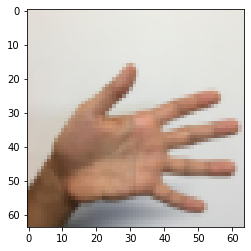

In [4]:
# Example of a picture
index = 0
plt.imshow(x_train[index])
print ("y = " + str(y_train[index]))

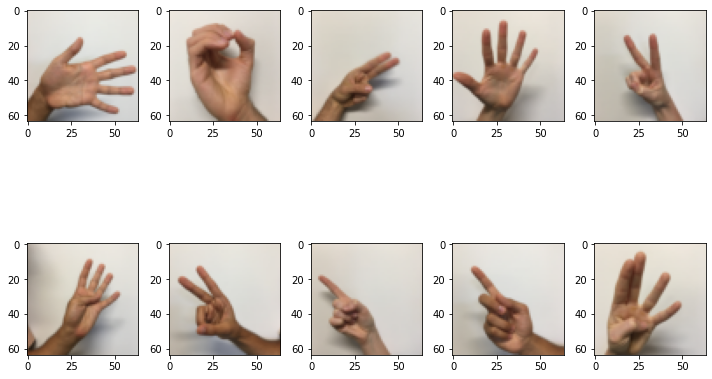

In [5]:
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(64, 64, 3) , cmap = "gray")
        k += 1
    plt.tight_layout()  

<a name='3'></a>
## Explore the dataset

In [6]:
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_test = x_test.shape[0]
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(x_train.shape))
print ("train_y shape: " + str(y_train.shape))
print ("test_x_orig shape: " + str(x_test.shape))
print ("test_y shape: " + str(y_test.shape))

Number of training examples: 1080
Number of testing examples: 120
Each image is of size: (64, 64, 3)
train_x_orig shape: (1080, 64, 64, 3)
train_y shape: (1080,)
test_x_orig shape: (120, 64, 64, 3)
test_y shape: (120,)


In [7]:
y_train[:10]

array([5, 0, 2, 5, 2, 4, 2, 1, 1, 4])

In [8]:
#Image to vector conversion.
train_x_flatten = x_train.reshape(x_train.shape[0], -1).T 
test_x_flatten = x_test.reshape(x_test.shape[0], -1).T
# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.0
test_x = test_x_flatten/255.0

from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_y = label_binarizer.fit_transform(y_train).T
test_y = label_binarizer.fit_transform(y_test).T
#train_y = y_train.reshape(1,-1) # convert to a shape of (classes,m)

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))

train_x's shape: (12288, 1080)
test_x's shape: (12288, 120)
train_y's shape: (6, 1080)


In [9]:
train_y[:10]

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

<a name='4'></a>
# Implementing L layered Neural Network

- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SOFTMAX*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a softmax activation function.
- Use random initialization for the weight matrices. Use `np.random.randn(shape) * 0.01`.
- Use zeros initialization for the biases. Use `np.zeros(shape)`.
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layers_dims`. For example, for `layers_dims` of [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. This means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 

## Initialization

In [10]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])* 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        
    return parameters

In [11]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layers_dims)  # integer representing the number of layers
     
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*np.sqrt(2/layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))    
    return parameters

In [12]:
# GRADED FUNCTION: initialize_parameters_he

def initialize_parameters(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layers_dims)  # integer representing the number of layers
     
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*0.01
        parameters['b' + str(l)] = np.random.randn(layers_dims[l], 1)  
    return parameters

### Activation functions

We will use 3 activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$.  This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

- **SOFTMAX**: The mathematical formula for Softmax is $A = SOFTMAX(Z) = e^Z/\sum(e^Z)$.  This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (it's what we will feed in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = softmax(Z)
```

In [13]:
def sigmoid(Z):
    """
    Compute the sigmoid of z
    Arguments:
    z -- A scalar or numpy array of any size.
    Return:
    s -- sigmoid(z)
    """
    return 1/(1 + np.exp(-Z)), Z

In [14]:
def relu(Z):
    return np.maximum(0,Z), Z

In [15]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0), x # only difference

In [16]:
x= [ 5,2,-1,3]
softmax(x)

(array([0.84203357, 0.04192238, 0.00208719, 0.11395685]), [5, 2, -1, 3])

## Forward propagation

We will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Softmax. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SOFTMAX (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

In [17]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A)+ b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [18]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    elif activation == "softmax":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [19]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu")
        caches.append(cache)
    
    # Implement LINEAR -> SOFTMAX. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="softmax")
    caches.append(cache)
    
    assert(AL.shape == (6,X.shape[1]))
            
    return AL, caches

## Compute cost

In [20]:
def stable_softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0), x # only difference

In [21]:
def cross_entropy(AL,y):
    """
    X is the output from fully connected layer (n_x * m)
    y is one-hot encoded vector (classes * num_examples)
    """
    m = y.shape[0]
    print("# of examples",m)
    print("AL.T shape: ",AL.T.shape)
    # We use multidimensional array indexing to extract 
    # softmax probability of the correct label for each sample.
    # Refer to https://docs.scipy.org/doc/numpy/user/basics.indexing.html#indexing-multi-dimensional-arrays for understanding multidimensional array indexing.
    #print(AL.T)
    #print(AL.T[np.arange(m)])
    #print(y)
    #print(AL.T[range(m),y])
    log_likelihood = -np.log(AL.T[range(m),y])
    loss = np.sum(log_likelihood)
    return loss

In [22]:
parameters = initialize_parameters([12288, 25, 12, 6])
AL, caches = L_model_forward(train_x, parameters)
print(cross_entropy(AL, y_train))

# of examples 1080
AL.T shape:  (1080, 6)
2502.733177413993


In [23]:
def compute_cost(AL,Y):
    tot_loss=-np.sum(Y*np.log(AL))
    return tot_loss

In [24]:
parameters = initialize_parameters([12288, 25, 12, 6])
AL, caches = L_model_forward(train_x, parameters)
print(AL.shape)
print(compute_cost(AL,train_y))

(6, 1080)
2502.733177413993


### Cost with L2 regularization

Calculate Frobenius norm as $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$ 

In [25]:
def compute_cost_with_reg(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    L2_regularization_cost =0
    L = len(parameters) // 2                  # number of layers in the neural network
    for l in range(1, L+1):
        W = parameters['W' + str(l)]
        L2_regularization_cost += np.sum(np.square(W))

    cross_entropy_cost = compute_cost(AL,Y) # This gives you the cross-entropy part of the cost
    
    cost = cross_entropy_cost + (lambd/2)*L2_regularization_cost
    
    return cost

In [26]:
parameters = initialize_parameters([12288, 25, 12, 6])
AL, caches = L_model_forward(train_x, parameters)
compute_cost_with_reg(AL,train_y,parameters,lambd=0.5)

2510.4105835842106

## Backward propagation

Now, similar to forward propagation, you are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or SOFTMAX activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SOFTMAX backward (whole model)

In [27]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

### Backward_propagation_with_regularization
Implement the changes needed in backward propagation to take into account regularization. The changes only concern dW. For each, you have to add the regularization term's gradient ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [28]:
def linear_backward_with_reg(dZ, cache, lambd):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m)*np.dot(dZ,A_prev.T) + ((lambd/m)*W)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

- **`softmax_backward`**: Implements the backward propagation for softmax unit. You can call it as follows:

```python
dZ = softmax_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward`,`relu_backward` and `softmax_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  


$$g'(Z^{[l]}) = dA/dZ$$

In [29]:
def relu_backward(dA, activation_cache):
    """
    Implement the backward propagation for a single RELU unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = activation_cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    #return 1. * (Z > 0)
    return dZ

def sigmoid_backward(dA, activation_cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = activation_cache
    
    A = sigmoid(Z)[0]
    dZ = dA * (A*(1-A))
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def softmax_backward(dA, Y,activation_cache):
    """
    Implement the backward propagation for a single SIGMOID unit.
    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently
    Returns:
    dZ -- Gradient of the cost with respect to Z
    https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1#:~:text=Jacobian%20of%20the%20Softmax%20Function
    """
    
    Z = activation_cache
    m = Y.shape[1]
    
    AL = softmax(Z)[0]
    #print("AL from softmax backward==>",AL)
    dZ = (AL - Y)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [30]:
parameters = initialize_parameters([12288, 25, 12, 6])
AL, caches = L_model_forward(train_x, parameters)
print("AL from l_model_forward==>",AL)
linear_cache, activation_cache = caches[2]
Y=train_y
dAL =  - np.divide(Y, AL)
softmax_backward(dAL, Y,activation_cache)

AL from l_model_forward==> [[0.06148947 0.06149826 0.06150662 ... 0.06150299 0.06149442 0.06151101]
 [0.63413758 0.63411441 0.63412212 ... 0.63410825 0.63410576 0.63410433]
 [0.10572267 0.10572588 0.105705   ... 0.105731   0.10574301 0.10570983]
 [0.03349555 0.03349226 0.03349031 ... 0.03349687 0.03349093 0.03349126]
 [0.09640859 0.09643527 0.09643459 ... 0.09643226 0.09643634 0.09644332]
 [0.06874613 0.06873392 0.06874135 ... 0.06872862 0.06872954 0.06874025]]


array([[ 0.06148947, -0.93850174,  0.06150662, ...,  0.06150299,
         0.06149442,  0.06151101],
       [ 0.63413758,  0.63411441,  0.63412212, ...,  0.63410825,
         0.63410576,  0.63410433],
       [ 0.10572267,  0.10572588, -0.894295  , ..., -0.894269  ,
         0.10574301,  0.10570983],
       [ 0.03349555,  0.03349226,  0.03349031, ...,  0.03349687,
         0.03349093,  0.03349126],
       [ 0.09640859,  0.09643527,  0.09643459, ...,  0.09643226,
        -0.90356366,  0.09644332],
       [-0.93125387,  0.06873392,  0.06874135, ...,  0.06872862,
         0.06872954, -0.93125975]])

In [31]:
def delta_cross_entropy(AL,y):
    """
    AL is the output from fully connected layer (num_classes * num_examples)
    y is labels (num_examples x 1)
    	Note that y is not one-hot encoded vector. 
    	It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
    """
    m = y.shape[0]
    AL.T[range(m),y] -= 1
    #AL = AL/m
    return AL

In [32]:
parameters = initialize_parameters([12288, 25, 12, 6])
AL, caches = L_model_forward(train_x, parameters)
print("AL from l_model_forward==>",AL)
delta_cross_entropy(AL,y_train)

AL from l_model_forward==> [[0.06148947 0.06149826 0.06150662 ... 0.06150299 0.06149442 0.06151101]
 [0.63413758 0.63411441 0.63412212 ... 0.63410825 0.63410576 0.63410433]
 [0.10572267 0.10572588 0.105705   ... 0.105731   0.10574301 0.10570983]
 [0.03349555 0.03349226 0.03349031 ... 0.03349687 0.03349093 0.03349126]
 [0.09640859 0.09643527 0.09643459 ... 0.09643226 0.09643634 0.09644332]
 [0.06874613 0.06873392 0.06874135 ... 0.06872862 0.06872954 0.06874025]]


array([[ 0.06148947, -0.93850174,  0.06150662, ...,  0.06150299,
         0.06149442,  0.06151101],
       [ 0.63413758,  0.63411441,  0.63412212, ...,  0.63410825,
         0.63410576,  0.63410433],
       [ 0.10572267,  0.10572588, -0.894295  , ..., -0.894269  ,
         0.10574301,  0.10570983],
       [ 0.03349555,  0.03349226,  0.03349031, ...,  0.03349687,
         0.03349093,  0.03349126],
       [ 0.09640859,  0.09643527,  0.09643459, ...,  0.09643226,
        -0.90356366,  0.09644332],
       [-0.93125387,  0.06873392,  0.06874135, ...,  0.06872862,
         0.06872954, -0.93125975]])

In [33]:
#g'(z)
def softmax_grad(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

In [34]:
parameters = initialize_parameters([12288, 25, 12, 6])
AL, caches = L_model_forward(train_x, parameters)
res = softmax_grad(AL)
print("res.shape: ",res.shape)

res.shape:  (6480, 6480)


In [35]:
Y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 1]])

In [36]:
def linear_activation_backward(dA, Y, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    elif activation == "softmax":
        dZ = softmax_backward(dA, Y, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [37]:
def linear_activation_backward_with_reg(dA, Y, cache, lambd, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_reg(dZ, linear_cache, lambd)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward_with_reg(dZ, linear_cache, lambd)
    
    elif activation == "softmax":
        dZ = softmax_backward(dA, Y, activation_cache)
        dA_prev, dW, db = linear_backward_with_reg(dZ, linear_cache, lambd)
        
    return dA_prev, dW, db

In [38]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers = 3
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL =  - np.divide(Y, AL)
    
    # Lth layer (SOFTMAX -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1] # for 2 layer n/w - hidden+output = 2 caches
    dA_prev, dW, db = linear_activation_backward(dAL, Y, current_cache, activation="softmax")
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = (dA_prev, dW, db)
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev, dW, db = linear_activation_backward(dA_prev, Y, current_cache, activation="relu")
        grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = (dA_prev, dW, db)

    return grads

In [39]:
def L_model_backward_with_reg(AL, Y, caches, lambd):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers = 3
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL =  - np.divide(Y, AL)
    
    # Lth layer (SOFTMAX -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1] # for 2 layer n/w - hidden+output = 2 caches
    dA_prev, dW, db = linear_activation_backward_with_reg(dAL, Y, current_cache, lambd, activation="softmax")
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = (dA_prev, dW, db)
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev, dW, db = linear_activation_backward_with_reg(dA_prev, Y, current_cache, lambd, activation="relu")
        grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = (dA_prev, dW, db)

    return grads

## Update Parameters

In [40]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)] 
    return parameters

### Adam Optimizer

In [41]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient. Initialized with zeros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros((parameters["W" + str(l)].shape[0],parameters["W" + str(l)].shape[1]))
        v["db" + str(l)] = np.zeros((parameters["b" + str(l)].shape[0],parameters["b" + str(l)].shape[1]))
        s["dW" + str(l)] = np.zeros((parameters["W" + str(l)].shape[0],parameters["W" + str(l)].shape[1]))
        s["db" + str(l)] = np.zeros((parameters["b" + str(l)].shape[0],parameters["b" + str(l)].shape[1]))
    
    return v, s

In [42]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    t -- Adam variable, counts the number of taken steps
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        v["dW" + str(l)] = beta1*v["dW" + str(l)] + (1-beta1)*grads['dW' + str(l)]     
        v["db" + str(l)] = beta1*v["db" + str(l)] + (1-beta1)*grads['db' + str(l)]

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        v_corrected["dW" + str(l)] = v["dW" + str(l)]/(1-beta1**t)
        v_corrected["db" + str(l)] = v["db" + str(l)]/(1-beta1**t)

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        s["dW" + str(l)] = beta2*s["dW" + str(l)] + (1-beta2)*(grads['dW' + str(l)]**2)     
        s["db" + str(l)] = beta2*s["db" + str(l)] + (1-beta2)*(grads['db' + str(l)]**2)

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        s_corrected["dW" + str(l)] = s["dW" + str(l)]/(1-beta2**t)
        s_corrected["db" + str(l)] = s["db" + str(l)]/(1-beta2**t)
    
        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        parameters['W' + str(l)] = parameters['W' + str(l)] - learning_rate*((v_corrected["dW" + str(l)]) /(np.sqrt(s_corrected["dW" + str(l)]) + epsilon))
        parameters['b' + str(l)] = parameters['b' + str(l)] - learning_rate*((v_corrected["db" + str(l)]) /(np.sqrt(s_corrected["db" + str(l)]) + epsilon))
    
    return parameters, v, s, v_corrected, s_corrected

### Generate Mini-Batches

In [43]:
def random_mini_batches(X, Y, mini_batch_size = 32, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation] #.reshape((1, m))
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * inc : (k+1) * inc]
        mini_batch_Y = shuffled_Y[:, k * inc : (k+1) * inc]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        k = num_complete_minibatches
        mini_batch_X = shuffled_X[:, k * inc : ]
        mini_batch_Y = shuffled_Y[:, k * inc : ]
        
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

### Model using Batch Gradient Descent

``` python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_epochs):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost
    cost_total = compute_cost(a, Y)  # Cost for m training examples
    # Backward propagation
    grads = backward_propagation(a, Y, caches)
    # Update parameters
    parameters = update_parameters(parameters, grads, learning_rate)
    # Compute average cost
    cost_avg = cost_total / m
        
```

In [54]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0001, num_iterations =1500, print_cost=False, lambd = 0, keep_prob = 1):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1,␣
    ,→number of examples)
    layers_dims -- list containing the input size and each layer size, of␣
    ,→length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    Returns:
    parameters -- parameters learnt by the model. They can then be used to␣
    ,→predict.
    """
    np.random.seed(1)
    m = X.shape[1]
    costs = [] # keep track of cost
    train_acc_scores = []
    
    # Parameters initialization.
    parameters = initialize_parameters(layers_dims)
    
    Y_enc = label_binarizer.fit_transform(Y).T
   
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            AL, caches = L_model_forward(X, parameters)
        elif keep_prob < 1:
            AL, caches = L_model_forward_with_dropout(X, parameters, keep_prob)

        # Compute cost.
        if lambd == 0:
            cost_total = compute_cost(AL, Y_enc)# Cost for m training examples
        else:
            cost_total = compute_cost_with_reg(AL, Y_enc, parameters, lambd)
        
        # Backward propagation.
        if lambd == 0 and keep_prob == 1:
            grads = L_model_backward(AL, Y_enc, caches)
        elif lambd != 0:
            grads = L_model_backward_with_reg(AL, Y_enc, caches, lambd)
        elif keep_prob < 1:
            grads = L_model_backward_with_dropout(AL, Y_enc, caches, keep_prob)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Compute average cost
        cost_avg = cost_total / m
          
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost_avg)))

        # Print the cost every 100 iterations
        if i % 10 == 0 or i == num_iterations - 1:
            train_preds = predict(X, parameters)
            train_acc = accuracy(Y, train_preds)
            train_acc_scores.append(train_acc)
            costs.append(cost_avg)
     
    print("Avg_costs :", costs)
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per 10)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.savefig('BGD_lr_'+str(learning_rate)+'.jpg')
    plt.show()
    
    return parameters, costs, train_acc_scores

### Mini-batch Gradient descent with Adam optimizer

```python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_epochs):
    #generate mini batches by shuffling and partitioning
    minibatches = random_mini_batches(X, Y, mini_batch_size)
    for minibatch in minibatches:
        #get x and y component of each minibatch
        (mini_X, mini_Y) = minibatch
        # Forward propagation
        a, caches = forward_propagation(mini_X, parameters)
        # Compute cost
        cost_total += compute_cost(a, mini_Y)  # Cost for one training example
        # Backward propagation
        grads = backward_propagation(a, mini_Y, caches)
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
    # Compute average cost
    cost_avg = cost_total / m
```

### Learning Rate Decay and Scheduling

In [45]:
def update_lr(learning_rate0, epoch_num, decay_rate):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer
    decay_rate -- Decay rate. Scalar

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    learning_rate = learning_rate0*(1/(1+(decay_rate*epoch_num)))
    return learning_rate

In [46]:
def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval=1000):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer.
    decay_rate -- Decay rate. Scalar.
    time_interval -- Number of epochs where you update the learning rate.

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    learning_rate = learning_rate0*(1/(1+(decay_rate*np.floor(epoch_num/time_interval))))
    
    return learning_rate

In [47]:
learning_rate = 0.5
print("Original learning rate: ", learning_rate)
epoch_num = 2500
decay_rate = 1
learning_rate_2 = update_lr(learning_rate, epoch_num, decay_rate)

print("Updated learning rate: ", learning_rate_2)

Original learning rate:  0.5
Updated learning rate:  0.00019992003198720512


In [48]:
def model_mgd(X_train, Y_train, X_test, Y_test,layers_dims, optimizer, learning_rate = 0.0001, mini_batch_size = 32, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 1500, print_cost = True, decay=None, decay_rate=1):
    """
    3-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X_train.shape[1]                   # number of training examples
    lr_rates = []
    learning_rate0 = learning_rate   # the original learning rate
    train_acc_scores =[]
    Y_train_enc = label_binarizer.fit_transform(Y_train).T
    Y_test_enc = label_binarizer.fit_transform(Y_test).T
    train_acc_scores = []
    test_acc_scores = []
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches_train = random_mini_batches(X_train, Y_train_enc, mini_batch_size, seed)
        minibatches_test = random_mini_batches(X_test, Y_test_enc, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches_train:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
            # Forward propagation
            AL, caches = L_model_forward(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_epoch = compute_cost(AL, minibatch_Y)
            cost_total += cost_epoch
            
            # Backward propagation
            grads = L_model_backward(AL, minibatch_Y, caches)


            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        
            train_preds = predict(minibatch_X, parameters)
            minibatch_Y_rev = np.argmax(minibatch_Y, axis=0)#label_binarizer.inverse_transform(minibatch_Y)
            train_acc = accuracy(minibatch_Y_rev, train_preds)
            
        cost_avg = cost_total / m
            
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
            
        # Print the cost every 100 epoch
        if print_cost and i % 100 == 0:            
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            
        if print_cost and i % 10 == 0:            
            costs.append(cost_avg)
            train_acc_scores.append(train_acc)
            
            for (minibatch_X_test, minibatch_Y_test) in minibatches_test:
                test_preds = predict(minibatch_X_test, parameters)
                minibatch_Y_test_rev = np.argmax(minibatch_Y_test, axis=0)
                test_acc = accuracy(minibatch_Y_test_rev, test_preds)
            test_acc_scores.append(test_acc)
                
            
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))

            
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.savefig('MBGD_lr_'+str(learning_rate)+'.jpg')
    plt.show()

    return parameters,costs,train_acc_scores, test_acc_scores

### Predict function

In [49]:
def predict(X,parameters):
    
    # X --> Input.
    # w --> weights.
    # b --> bias.
    
    # Predicting
    y_hat, caches = L_model_forward(X, parameters)
    
    # Returning the class with highest probability.
    return np.argmax(y_hat, axis=0)

In [50]:
def accuracy(y, y_hat):
    return np.sum(y==y_hat)/len(y)

### Hyperparameter tuning

In [51]:
def tune_alpha(X, Y, X_test, y_test, layers_dims, optimizer = "adam", num_epochs=2000, num_iterations= 2000, method=None,  decay=None, print_cost = True):
    
    obj_vals = []
    beta_vals = [] 
    t_all = []

    for t in [10**i for i in range(-4, 0)]:
        print("Value of η: "+str(t))
        if method == 'mini-batch':
            parameters,costs,train_scores,test_scores = model_mgd(X, Y, X_test, y_test,layers_dims, optimizer, t, decay=None)
        else:
            parameters,costs,train_scores = L_layer_model(X, Y, layers_dims,t, print_cost=True)
        
        beta_vals.append(parameters) # get all beta values
        obj_vals.append(costs) # get all obj values
        t_all.append(t)
        print()
        
    final_costs = [item[-1] for item in obj_vals]
    print("final cost",final_costs )
    
    if method == 'mini-batch':
        return final_costs, train_scores, test_scores, beta_vals, obj_vals, t_all
    else:
        return final_costs, train_scores, beta_vals, obj_vals, t_all
    

## Model Batch Gradient Descent

In [52]:
### CONSTANTS ###
layers_dims = [12288, 25, 12, 6] # 3-layer model

Value of η: 0.0001
Cost after iteration 0: 2.317345534642586
Cost after iteration 100: 2.3036494390417586
Cost after iteration 200: 2.2903005219542734
Cost after iteration 300: 2.277266446589716
Cost after iteration 400: 2.264517923972729
Cost after iteration 500: 2.252028062953036
Cost after iteration 600: 2.239771750301491
Cost after iteration 700: 2.2277250573548475
Cost after iteration 800: 2.2158645538392814
Cost after iteration 900: 2.204166807034079
Cost after iteration 1000: 2.1926077714722187
Cost after iteration 1100: 2.1811623577007606
Cost after iteration 1200: 2.1698034206495254
Cost after iteration 1300: 2.1585011385898984
Cost after iteration 1400: 2.14722320161823
Cost after iteration 1499: 2.136047181805438
Avg_costs : [2.317345534642586, 2.3159593058553796, 2.3145768682600103, 2.313198184314989, 2.3118232170196897, 2.3104519297657125, 2.3090842858698544, 2.3077202498606564, 2.3063597867798644, 2.3050028613751117, 2.3036494390417586, 2.302299485530738, 2.30095296599322

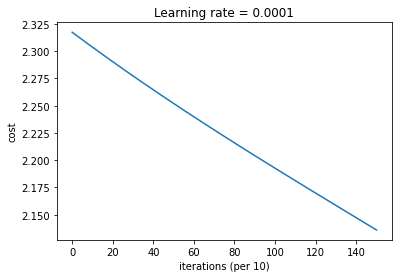


Value of η: 0.001
Cost after iteration 0: 2.317345534642586
Cost after iteration 100: 2.1925891519351506
Cost after iteration 200: 2.0779888558707955
Cost after iteration 300: 1.9394560750370837
Cost after iteration 400: 1.829679484211729
Cost after iteration 500: 1.8041039670470698
Cost after iteration 600: 1.7990347169854235
Cost after iteration 700: 1.797225082758395
Cost after iteration 800: 1.7962916447627768
Cost after iteration 900: 1.795643836235124
Cost after iteration 1000: 1.7950877441549555
Cost after iteration 1100: 1.794557043417673
Cost after iteration 1200: 1.7940284887213587
Cost after iteration 1300: 1.7934932982241714
Cost after iteration 1400: 1.7929474694535437
Cost after iteration 1499: 1.7923941897499818
Avg_costs : [2.317345534642586, 2.3036416547124534, 2.2902865346911128, 2.277247666694447, 2.2644956303503823, 2.252003446229583, 2.2397459516861185, 2.2276992144668495, 2.215839831609657, 2.2041444569810054, 2.1925891519351506, 2.1811490038635784, 2.16979711691

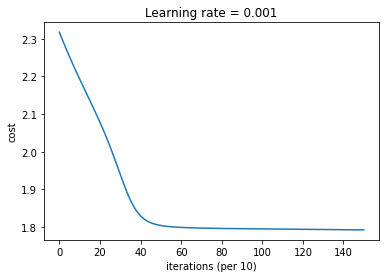


Value of η: 0.01
Cost after iteration 0: 2.317345534642586
Cost after iteration 100: 1.7950623822032323
Cost after iteration 200: 1.7892774367989484
Cost after iteration 300: 1.780529168362701
Cost after iteration 400: 1.7627726602558205
Cost after iteration 500: 1.7201714856438317
Cost after iteration 600: 1.6737063299946124
Cost after iteration 700: 1.6487866278056866
Cost after iteration 800: 1.6466966961484115
Cost after iteration 900: 1.6202616892880977
Cost after iteration 1000: 1.5767956243798413
Cost after iteration 1100: 1.5506119710180035
Cost after iteration 1200: 1.527403908147545
Cost after iteration 1300: 1.5078924701215506
Cost after iteration 1400: 1.4860677570352923
Cost after iteration 1499: 1.473955082378839
Avg_costs : [2.317345534642586, 2.1923817386450426, 2.079403825964037, 1.9455993416056605, 1.8320866323210154, 1.8045891229631867, 1.7992176105014583, 1.7972746641972628, 1.796290939147829, 1.7956252429291177, 1.7950623822032323, 1.7945285746512738, 1.7939980769

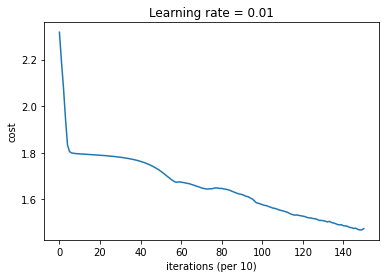


Value of η: 0.1
Cost after iteration 0: 2.317345534642586
Cost after iteration 100: 1.7815954165848502
Cost after iteration 200: 1.7917600704574548
Cost after iteration 300: 1.7917594692280554
Cost after iteration 400: 1.791759469228055
Cost after iteration 500: 1.7917594692280554
Cost after iteration 600: 1.7917594692280554
Cost after iteration 700: 1.7917594692280554
Cost after iteration 800: 1.7917594692280554
Cost after iteration 900: 1.7917594692280554
Cost after iteration 1000: 1.7917594692280554
Cost after iteration 1100: 1.7917594692280554
Cost after iteration 1200: 1.7917594692280554
Cost after iteration 1300: 1.7917594692280554
Cost after iteration 1400: 1.7917594692280554
Cost after iteration 1499: 1.7917594692280554
Avg_costs : [2.317345534642586, 1.7948120100217637, 1.7887866897255205, 1.7793965747968437, 1.7595017353557856, 1.7873823623403058, 1.7736871388237365, 1.7839827050459065, 1.7983837853076312, 1.78822381301095, 1.7815954165848502, 1.7924752154857833, 1.791827423

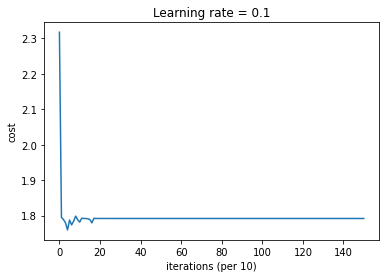


final cost [2.136047181805438, 1.7923941897499818, 1.473955082378839, 1.7917594692280554]
best_obj_idx: 
 2

best learning rate 0.01


In [55]:
final_costs_bgd, scores_bgd, beta_vals_bgd, obj_vals_bgd, t_all_bgd = tune_alpha(train_x, y_train,test_x, y_test, layers_dims, method=None)
#Return the indices of the minimum values in the specified axis ignoring NaNs.
best_obj_idx = np.nanargmin(final_costs_bgd)
best_score_idx = np.nanargmax(scores_bgd)
best_params_bgd = beta_vals_bgd[best_obj_idx]
best_lr_bgd = t_all_bgd[best_obj_idx]
print("best_obj_idx: \n",best_obj_idx)
print()
print("best learning rate", best_lr_bgd)

### Model BGD with No regularization with best learning rate from hyperparameter tuning

learning rate:  0.01
Cost after iteration 0: 2.317345534642586
Cost after iteration 100: 1.7950623822032323
Cost after iteration 200: 1.7892774367989484
Cost after iteration 300: 1.780529168362701
Cost after iteration 400: 1.7627726602558205
Cost after iteration 500: 1.7201714856438317
Cost after iteration 600: 1.6737063299946124
Cost after iteration 700: 1.6487866278056866
Cost after iteration 800: 1.6466966961484115
Cost after iteration 900: 1.6202616892880977
Cost after iteration 1000: 1.5767956243798413
Cost after iteration 1100: 1.5506119710180035
Cost after iteration 1200: 1.527403908147545
Cost after iteration 1300: 1.5078924701215506
Cost after iteration 1400: 1.4860677570352923
Cost after iteration 1500: 1.4665424378126302
Cost after iteration 1600: 1.4483631748058317
Cost after iteration 1700: 1.424255681580432
Cost after iteration 1800: 1.4132457756886072
Cost after iteration 1900: 1.3987857503274406
Cost after iteration 1999: 1.3889331152625897
Avg_costs : [2.31734553464258

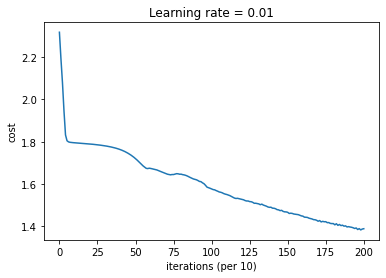

In [56]:
print("learning rate: ", best_lr_bgd)
best_params_bgd, costs_bgd, train_scores_bgd = L_layer_model(train_x, y_train, layers_dims,learning_rate = best_lr_bgd, num_iterations= 2000, print_cost = True)

In [57]:
# Accuracy for training set.
train_preds = predict(train_x, best_params_bgd)
print("train acc :" ,accuracy(y_train, train_preds))

# Accuracy for test set.
test_preds = predict(test_x, best_params_bgd)
print("test acc :",accuracy(y_test, test_preds))

train acc : 0.37777777777777777
test acc : 0.4083333333333333


Clearly the model is underfitting.

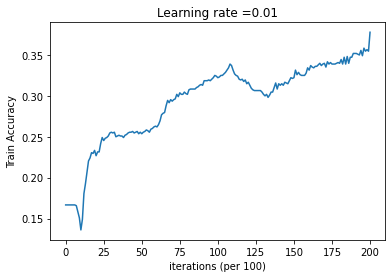

In [58]:
# Plot the train accuracy
plt.plot(np.squeeze(train_scores_bgd))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per 100)')
plt.title("Learning rate =" + str(0.01))
plt.savefig('BGD_noreg_train_acc.jpg')
plt.show()

### Model BGD with L2 regularization

The Batch gradient descent with regularization is not helpful as the model is underfitting

learning rate:  0.01
regularization parameter : 5
Cost after iteration 0: 2.3884326288112683
Cost after iteration 100: 2.3882805803365423
Cost after iteration 200: 2.3876726108685933
Cost after iteration 300: 2.3871272393500136
Cost after iteration 400: 2.386725411715244
Cost after iteration 500: 2.3866637135426014
Cost after iteration 600: 2.3869551908801387
Cost after iteration 700: 2.3869853223664346
Cost after iteration 800: 2.387214067345281
Cost after iteration 900: 2.3874063026997874
Cost after iteration 1000: 2.3876684224730464
Cost after iteration 1100: 2.388042862501275
Cost after iteration 1200: 2.3884936207978367
Cost after iteration 1300: 2.3890091706754633
Cost after iteration 1400: 2.3895192770328815
Cost after iteration 1499: 2.390032460728472
Avg_costs : [2.3884326288112683, 2.3883919032015006, 2.3883967217975437, 2.388457986314472, 2.3885533188426025, 2.3885704233462004, 2.3885277771768587, 2.388468830919815, 2.3884064405764227, 2.388343467917279, 2.3882805803365423, 

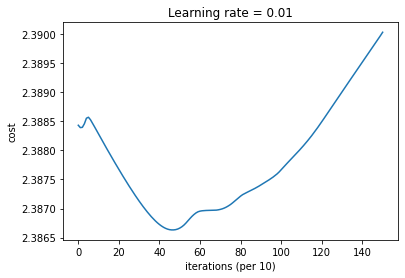

In [59]:
print("learning rate: ", best_lr_bgd)
lambd=5
print("regularization parameter :", lambd)
best_params_bgd, costs_bgd, train_scores_bgd = L_layer_model(train_x, y_train, layers_dims,learning_rate = best_lr_bgd, num_iterations= 1500, print_cost = True, lambd=lambd)

In [60]:
# Accuracy for training set.
train_preds = predict(train_x, best_params_bgd)
print("train acc :" ,accuracy(y_train, train_preds))

# Accuracy for test set.
test_preds = predict(test_x, best_params_bgd)
print("test acc :",accuracy(y_test, test_preds))

train acc : 0.3175925925925926
test acc : 0.3333333333333333


## Model Mini-Batch Gradient Descent with Adam Optimiser and learning rate decay on every iteration

Adam usually outperforms mini-batch gradient descent and Momentum. Adam converges a lot faster. Some advantages of Adam include:

- Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum) 
- Usually works well even with little tuning of hyperparameters (except $\alpha$)

Learning rate is another hyperparameter that can help you speed up learning. During the first part of training, your model can get away with taking large steps, but over time, using a fixed value for the learning rate alpha can cause your model to get stuck in a wide oscillation that never quite converges. But if you were to slowly reduce your learning rate alpha over time, you could then take smaller, slower steps that bring you closer to the minimum. This is the idea behind learning rate decay. Learning rate decay can be achieved by using either adaptive methods or pre-defined learning rate schedules. This model includes two new parameters, decay and decay_rate. 

Here, we apply scheduled learning rate decay to a L-layer neural network in Adam optimizer mode and see the effect of scheduling at different epochs. We try one of the pre-defined schedules for learning rate decay, called exponential learning rate decay. It takes this mathematical form:

$$\alpha = \frac{1}{1 + decayRate \times epochNumber} \alpha_{0}$$

Value of η: 0.0001
Cost after epoch 0: 2.299415
Cost after epoch 100: 1.364112
Cost after epoch 200: 1.031056
Cost after epoch 300: 0.798309
Cost after epoch 400: 0.627651
Cost after epoch 500: 0.488071
Cost after epoch 600: 0.384691
Cost after epoch 700: 0.299921
Cost after epoch 800: 0.222078
Cost after epoch 900: 0.156073
Cost after epoch 1000: 0.118122
Cost after epoch 1100: 0.081573
Cost after epoch 1200: 0.056992
Cost after epoch 1300: 0.036655
Cost after epoch 1400: 0.021973


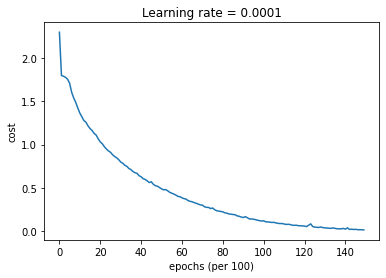


Value of η: 0.001
Cost after epoch 0: 1.980534
Cost after epoch 100: 0.396271
Cost after epoch 200: 0.076641
Cost after epoch 300: 0.025806
Cost after epoch 400: 0.106246
Cost after epoch 500: 0.006960
Cost after epoch 600: 0.005395
Cost after epoch 700: 0.473219
Cost after epoch 800: 0.219326
Cost after epoch 900: 0.106133
Cost after epoch 1000: 0.048604
Cost after epoch 1100: 0.035926
Cost after epoch 1200: 0.024031
Cost after epoch 1300: 0.021367
Cost after epoch 1400: 0.020179


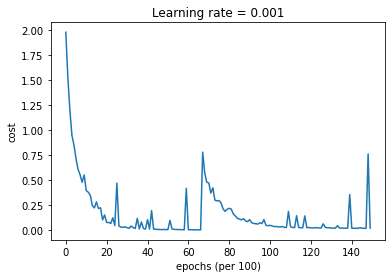


Value of η: 0.01
Cost after epoch 0: 1.921679
Cost after epoch 100: 1.793051
Cost after epoch 200: 1.792793
Cost after epoch 300: 1.792742
Cost after epoch 400: 1.792786
Cost after epoch 500: 1.793018
Cost after epoch 600: 1.792581
Cost after epoch 700: 1.792887
Cost after epoch 800: 1.793038
Cost after epoch 900: 1.793222
Cost after epoch 1000: 1.792784
Cost after epoch 1100: 1.793488
Cost after epoch 1200: 1.792966
Cost after epoch 1300: 1.793067
Cost after epoch 1400: 1.792908


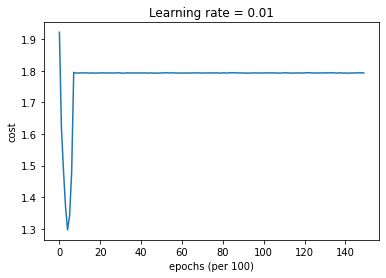


Value of η: 0.1
Cost after epoch 0: 3.740009
Cost after epoch 100: 1.800939
Cost after epoch 200: 1.800744
Cost after epoch 300: 1.803898
Cost after epoch 400: 1.803789
Cost after epoch 500: 1.800390
Cost after epoch 600: 1.800997
Cost after epoch 700: 1.800503
Cost after epoch 800: 1.804721
Cost after epoch 900: 1.800989
Cost after epoch 1000: 1.803999
Cost after epoch 1100: 1.798830
Cost after epoch 1200: 1.804106
Cost after epoch 1300: 1.803213
Cost after epoch 1400: 1.804062


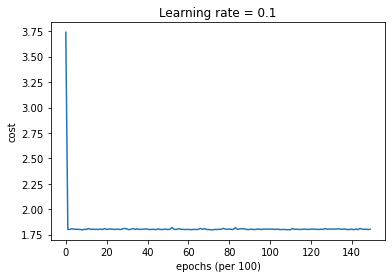


final cost [0.013127861849905702, 0.02094008491631702, 1.7925923533769066, 1.8031448070688398]


In [62]:
final_costs_mgd, train_scores_mgd, test_scores_mgd, beta_vals_mgd, obj_vals_mgd, t_all_mgd = tune_alpha(train_x, y_train, test_x, y_test, layers_dims, method="mini-batch")

In [63]:
#Return the indices of the minimum values in the specified axis ignoring NaNs.
best_obj_idx = np.nanargmin(final_costs_mgd)
best_score_idx = np.nanargmax(train_scores_mgd)
best_params_mgd = beta_vals_mgd[best_obj_idx]
best_lr_mgd = t_all_mgd[best_obj_idx]
print("best_obj_idx: \n",best_obj_idx)
print()
print("best learning rate", best_lr_mgd)

best_obj_idx: 
 0

best learning rate 0.0001


Cost after epoch 0: 1.980534
Cost after epoch 100: 0.396271
Cost after epoch 200: 0.076641
Cost after epoch 300: 0.025806
Cost after epoch 400: 0.106246
Cost after epoch 500: 0.006960
Cost after epoch 600: 0.005395
Cost after epoch 700: 0.473219
Cost after epoch 800: 0.219326
Cost after epoch 900: 0.106133
Cost after epoch 1000: 0.048604
Cost after epoch 1100: 0.035926
Cost after epoch 1200: 0.024031
Cost after epoch 1300: 0.021367
Cost after epoch 1400: 0.020179


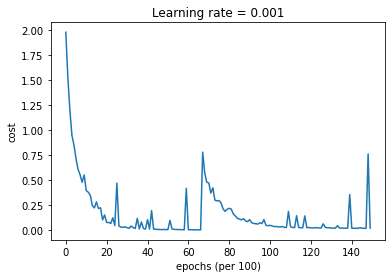

In [64]:
best_params_mgd,costs_mgd,train_scores_mgd,test_scores_mgd = model_mgd(train_x, y_train,test_x, y_test, layers_dims, optimizer = "adam", learning_rate = 0.001, num_epochs=1500, decay=None)

In [65]:
# Accuracy for training set.
train_preds = predict(train_x, best_params_mgd)
train_acc = accuracy(y_train, train_preds)
print("train accuracy: ",train_acc)

# Accuracy for test set.
test_preds = predict(test_x, best_params_mgd)
test_acc = accuracy(y_test, test_preds)
print("test accuracy: ",test_acc)

train accuracy:  0.9962962962962963
test accuracy:  0.7666666666666667


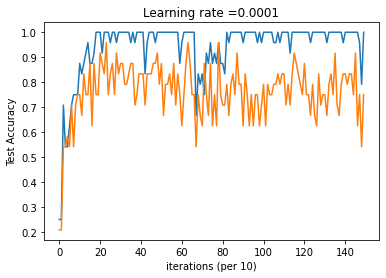

In [66]:
# Plot the train accuracy
plt.plot(np.squeeze(train_scores_mgd))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per 10)')
plt.title("Learning rate =" + str(0.0001))
# Plot the test accuracy
plt.plot(np.squeeze(test_scores_mgd))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per 10)')
plt.title("Learning rate =" + str(0.0001))
plt.savefig('MBGD_noreg_adam_decay.jpg');
plt.show()


## Model Mini-Batch Gradient Descent with Adam Optimiser and Fixed Interval Scheduling for learning rate

We can help prevent the learning rate speeding to zero too quickly by scheduling the exponential learning rate decay at a fixed time interval, for example 1000. You can either number the intervals, or divide the epoch by the time interval, which is the size of window with the constant learning rate. We can implement the learning rate scheduling such that it only changes when the epochNum is a multiple of the timeInterval.

**Note:** The fraction in the denominator uses the floor operation. 

$$\alpha = \frac{1}{1 + decayRate \times \lfloor\frac{epochNum}{timeInterval}\rfloor} \alpha_{0}$$


<img src="images/lr.png" style="width:400px;height:250px;">

Cost after epoch 0: 2.299415
learning rate after epoch 0: 0.000100
learning rate after epoch 10: 0.000100
learning rate after epoch 20: 0.000100
learning rate after epoch 30: 0.000100
learning rate after epoch 40: 0.000100
learning rate after epoch 50: 0.000100
learning rate after epoch 60: 0.000100
learning rate after epoch 70: 0.000100
learning rate after epoch 80: 0.000100
learning rate after epoch 90: 0.000100
Cost after epoch 100: 1.364112
learning rate after epoch 100: 0.000100
learning rate after epoch 110: 0.000100
learning rate after epoch 120: 0.000100
learning rate after epoch 130: 0.000100
learning rate after epoch 140: 0.000100
learning rate after epoch 150: 0.000100
learning rate after epoch 160: 0.000100
learning rate after epoch 170: 0.000100
learning rate after epoch 180: 0.000100
learning rate after epoch 190: 0.000100
Cost after epoch 200: 1.031056
learning rate after epoch 200: 0.000100
learning rate after epoch 210: 0.000100
learning rate after epoch 220: 0.000100


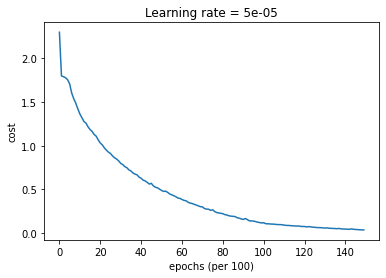

In [67]:
best_params_mgdd,costs_mgdd,train_scores_mgdd,test_scores_mgdd = model_mgd(train_x, y_train,test_x, y_test,  layers_dims, optimizer = "adam", learning_rate = 0.0001, num_epochs=1500, decay=schedule_lr_decay)

In [68]:
# Accuracy for training set.
train_preds = predict(train_x, best_params_mgdd)
train_acc = accuracy(y_train, train_preds)
print("train accuracy: ",train_acc)

# Accuracy for test set.
test_preds = predict(test_x, best_params_mgdd)
test_acc = accuracy(y_test, test_preds)
print("test accuracy: ",test_acc)

train accuracy:  0.9962962962962963
test accuracy:  0.7666666666666667


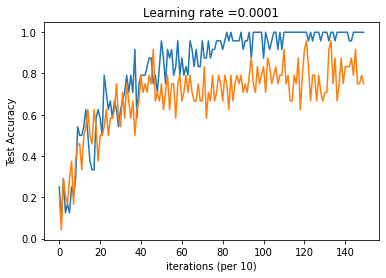

In [79]:
# Plot the train accuracy
plt.plot(np.squeeze(train_scores_mgdd))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per 10)')
plt.title("Learning rate =" + str(0.0001))
# Plot the test accuracy
plt.plot(np.squeeze(test_scores_mgdd))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per 10)')
plt.title("Learning rate =" + str(0.0001))
plt.savefig('MBGD_noreg_adam_scheduled_decay.jpg');
plt.show()

<a name='2'></a>
## Mini Batch gradient Descent with Adam Optimizer using Tensor flow

The beauty of TensorFlow 2 is in its simplicity. Basically, all you need to do is implement forward propagation through a computational graph. TensorFlow will compute the derivatives for you, by moving backwards through the graph recorded with `GradientTape`. All that's left for you to do then is specify the cost function and optimizer you want to use! 

When writing a TensorFlow program, the main object to get used and transformed is the `tf.Tensor`. These tensors are the TensorFlow equivalent of Numpy arrays, i.e. multidimensional arrays of a given data type that also contain information about the computational graph.

Below, you'll use `tf.Variable` to store the state of your variables. Variables can only be created once as its initial value defines the variable shape and type. Additionally, the `dtype` arg in `tf.Variable` can be set to allow data to be converted to that type. But if none is specified, either the datatype will be kept if the initial value is a Tensor, or `convert_to_tensor` will decide. It's generally best for you to specify directly, so nothing breaks!


Here you'll call the TensorFlow dataset created on a HDF5 file, which you can use in place of a Numpy array to store your datasets. You can think of this as a TensorFlow data generator! 

You will use the Hand sign data set, that is composed of images with shape 64x64x3.

Since TensorFlow Datasets are generators, you can't access directly the contents unless you iterate over them in a for loop, or by explicitly creating a Python iterator using `iter` and consuming its
elements using `next`. Also, you can inspect the `shape` and `dtype` of each element using the `element_spec` attribute.

## Tensor

In [89]:
train_dataset = h5py.File('datasets/train_signs.h5', "r")
test_dataset = h5py.File('datasets/test_signs.h5', "r")

layers_dims = [12288, 25, 12, 6] # 3-layer model

x_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_x'])
y_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_y'])
x_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_x'])
y_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_y']);

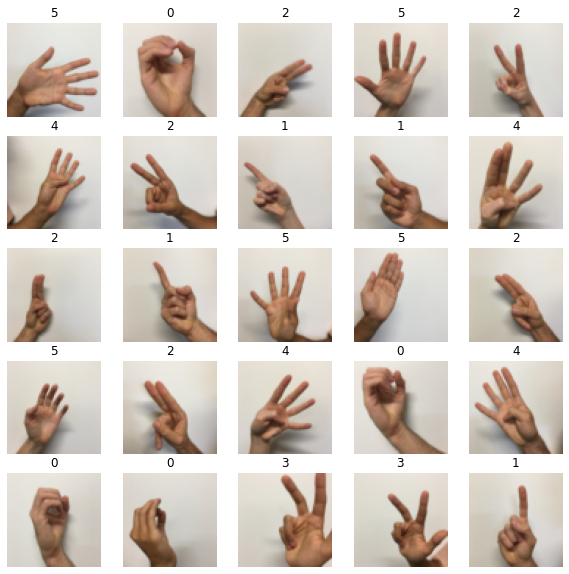

In [90]:
images_iter = iter(x_train)
labels_iter = iter(y_train)
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(next(images_iter).numpy().astype("uint8"))
    plt.title(next(labels_iter).numpy().astype("uint8"))
    plt.axis("off")
plt.savefig('Input_Data_HandSigns.jpg')

In [82]:
def normalize(image):
    """
    Transform an image into a tensor of shape (64 * 64 * 3, )
    and normalize its components.
    
    Arguments
    image - Tensor.
    
    Returns: 
    result -- Transformed tensor 
    """
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [-1,])
    return image

train_x = x_train.map(normalize)
test_x = x_test.map(normalize)

In [91]:
def one_hot_matrix(label, depth=6):
    """
    Computes the one hot encoding for a single label
    
    Arguments:
        label --  (int) Categorical labels
        depth --  (int) Number of different classes that label can take
    
    Returns:
         one_hot -- tf.Tensor A single-column matrix with the one hot encoding.
    """
    one_hot = tf.reshape(tf.one_hot(label, depth, axis=0),[-1,])
    
    return one_hot

test_y = y_test.map(one_hot_matrix)
train_y = y_train.map(one_hot_matrix)

In [92]:
def initialize_parameters(layers_dims):
    """
    Initializes parameters to build a neural network with TensorFlow. The shapes are:
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
                                
    initializer = tf.keras.initializers.GlorotNormal(seed=1)   
    
    parameters = {}
    L = len(layers_dims)  # integer representing the number of layers
     
    for l in range(1, L):
        parameters['W' + str(l)] = tf.Variable(initializer(shape=(layers_dims[l], layers_dims[l-1]))) #*np.sqrt(2/layers_dims[l-1]))
        parameters['b' + str(l)] = tf.Variable(initializer(shape=(layers_dims[l], 1)))  
    return parameters

In [93]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """

    A = X
    L = len(parameters) // 2    # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). 
    for l in range(1, L):
        A_prev = A 
        Z = tf.matmul(parameters['W' + str(l)],A_prev)+ parameters['b' + str(l)]
        A = tf.keras.activations.relu(Z)
       
    # Implement LINEAR -> softmax. 
    Z = tf.matmul(parameters['W' + str(L)],A)+ parameters['b' + str(L)]
    
    return Z

In [94]:
def compute_total_loss(logits, labels):
    """
    Computes the total loss
    
    Arguments:
    logits -- output of forward propagation (output of the last LINEAR unit), of shape (6, num_examples)
    labels -- "true" labels vector, same shape as Z3
    
    Returns:
    total_loss - Tensor of the total loss value
    """
    
    total_loss = (tf.reduce_sum(tf.keras.losses.categorical_crossentropy(tf.transpose(labels), tf.transpose(logits), from_logits=True)))
    return total_loss

In [95]:
parameters = initialize_parameters(layers_dims)

In [97]:
def model(X_train, Y_train, X_test, Y_test, layers_dims, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 10 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    costs = []                                        # To keep track of the cost
    train_acc = []
    test_acc = []
    
    # Initialize your parameters
    #(1 line)
    parameters = initialize_parameters(layers_dims)

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    optimizer = tf.keras.optimizers.Adam(learning_rate)
    
    # The CategoricalAccuracy will track the accuracy for this multiclass problem
    test_accuracy = tf.keras.metrics.CategoricalAccuracy()
    train_accuracy = tf.keras.metrics.CategoricalAccuracy()
    
    dataset = tf.data.Dataset.zip((X_train, Y_train))
    test_dataset = tf.data.Dataset.zip((X_test, Y_test))
    
    # We can get the number of elements of a dataset using the cardinality method
    m = dataset.cardinality().numpy()
    
    minibatches = dataset.batch(minibatch_size).prefetch(8)
    test_minibatches = test_dataset.batch(minibatch_size).prefetch(8)
    #X_train = X_train.batch(minibatch_size, drop_remainder=True).prefetch(8)# <<< extra step    
    #Y_train = Y_train.batch(minibatch_size, drop_remainder=True).prefetch(8) # loads memory faster 

    # Do the training loop
    for epoch in range(num_epochs):

        epoch_total_loss = 0.
        
        #We need to reset object to start measuring from 0 the accuracy each epoch
        train_accuracy.reset_states()
        
        for (minibatch_X, minibatch_Y) in minibatches:
            
            with tf.GradientTape() as tape:
                # 1. predict
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)
                # 2. loss
                minibatch_total_loss = compute_total_loss(Z3, tf.transpose(minibatch_Y))

            # We accumulate the accuracy of all the batches
            train_accuracy.update_state(minibatch_Y, tf.transpose(Z3))
            
            trainable_variables = [W1, b1, W2, b2, W3, b3]
            grads = tape.gradient(minibatch_total_loss, trainable_variables)
            optimizer.apply_gradients(zip(grads, trainable_variables))
            epoch_total_loss += minibatch_total_loss
        
        # We divide the epoch total loss over the number of samples
        epoch_total_loss /= m

        # Print the cost every 10 epochs
        if print_cost == True and epoch % 10 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_total_loss))
            print("Train accuracy:", train_accuracy.result())
            
            # We evaluate the test set every 10 epochs to avoid computational overhead
            for (minibatch_X, minibatch_Y) in test_minibatches:
                Z3 = forward_propagation(tf.transpose(minibatch_X), parameters)
                test_accuracy.update_state(minibatch_Y, tf.transpose(Z3))
            print("Test_accuracy:", test_accuracy.result())

            costs.append(epoch_total_loss)
            train_acc.append(train_accuracy.result())
            test_acc.append(test_accuracy.result())
            test_accuracy.reset_states()


    return parameters, costs, train_acc, test_acc

parameters, costs, train_acc, test_acc = model(train_x, train_y, test_x, test_y, layers_dims, num_epochs=1500)

Cost after epoch 0: 1.830244
Train accuracy: tf.Tensor(0.17037037, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.2, shape=(), dtype=float32)
Cost after epoch 10: 1.552390
Train accuracy: tf.Tensor(0.35925925, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.30833334, shape=(), dtype=float32)
Cost after epoch 20: 1.347577
Train accuracy: tf.Tensor(0.5083333, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.45, shape=(), dtype=float32)
Cost after epoch 30: 1.162699
Train accuracy: tf.Tensor(0.6111111, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.51666665, shape=(), dtype=float32)
Cost after epoch 40: 1.035301
Train accuracy: tf.Tensor(0.6574074, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.55, shape=(), dtype=float32)
Cost after epoch 50: 0.946186
Train accuracy: tf.Tensor(0.6787037, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.6166667, shape=(), dtype=float32)
Cost after epoch 60: 0.880409
Train accuracy: tf.Tensor(0.70092595, shape=(), dtype=float32)
Te

Cost after epoch 540: 0.168561
Train accuracy: tf.Tensor(0.962963, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.7416667, shape=(), dtype=float32)
Cost after epoch 550: 0.156512
Train accuracy: tf.Tensor(0.96574074, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.7416667, shape=(), dtype=float32)
Cost after epoch 560: 0.147727
Train accuracy: tf.Tensor(0.9685185, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.73333335, shape=(), dtype=float32)
Cost after epoch 570: 0.141543
Train accuracy: tf.Tensor(0.97037035, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.73333335, shape=(), dtype=float32)
Cost after epoch 580: 0.133514
Train accuracy: tf.Tensor(0.9722222, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.73333335, shape=(), dtype=float32)
Cost after epoch 590: 0.126700
Train accuracy: tf.Tensor(0.97314817, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.7416667, shape=(), dtype=float32)
Cost after epoch 600: 0.120618
Train accuracy: tf.Tensor(0.9787037, sha

Cost after epoch 1080: 0.018605
Train accuracy: tf.Tensor(1.0, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.8, shape=(), dtype=float32)
Cost after epoch 1090: 0.017249
Train accuracy: tf.Tensor(1.0, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.8, shape=(), dtype=float32)
Cost after epoch 1100: 0.015999
Train accuracy: tf.Tensor(1.0, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.8, shape=(), dtype=float32)
Cost after epoch 1110: 0.014878
Train accuracy: tf.Tensor(1.0, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.8, shape=(), dtype=float32)
Cost after epoch 1120: 0.013787
Train accuracy: tf.Tensor(1.0, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.8, shape=(), dtype=float32)
Cost after epoch 1130: 0.013084
Train accuracy: tf.Tensor(1.0, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.8, shape=(), dtype=float32)
Cost after epoch 1140: 0.012220
Train accuracy: tf.Tensor(1.0, shape=(), dtype=float32)
Test_accuracy: tf.Tensor(0.8, shape=(), dtype=float32)

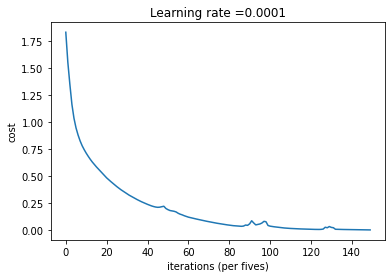

In [106]:
# Plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.savefig('MBGD_noreg_tensor.jpg');
plt.show()


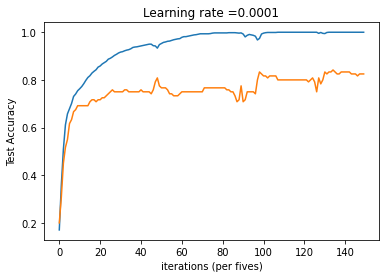

In [107]:
# Plot the train accuracy
plt.plot(np.squeeze(train_acc))
plt.ylabel('Train Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
# Plot the test accuracy
plt.plot(np.squeeze(test_acc))
plt.ylabel('Test Accuracy')
plt.xlabel('iterations (per fives)')
plt.title("Learning rate =" + str(0.0001))
plt.savefig('MBGD_tensorflow_accuracy_today.jpg')
plt.show()


<a name='4'></a>
## Additional Resources

Introduction to Gradients and Automatic Differentiation: 
https://www.tensorflow.org/guide/autodiff 

GradientTape documentation:
https://www.tensorflow.org/api_docs/python/tf/GradientTape